In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
my_data=pd.read_csv(r"F:\JUPYTER\notbook\trainingn\csv\1632300362534233.csv")
my_data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
my_data.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
for i in my_data['Area']:
    cleaned_value = i.strip().replace(',', '') 
    if int(cleaned_value) > 1000:  
        index_location = my_data[my_data['Area'] == i].index
        my_data.drop(index_location , inplace=True)
my_data = my_data.dropna()

array([[<Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

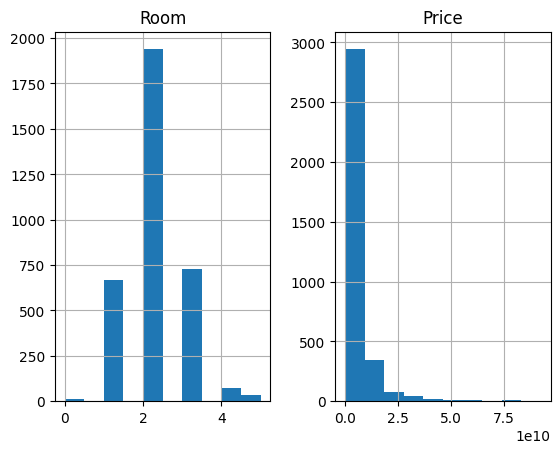

In [5]:
cdf=my_data[['Area', 'Room', 'Parking',	'Warehouse',	'Elevator',	'Address' ,	'Price']]
cdf.hist()

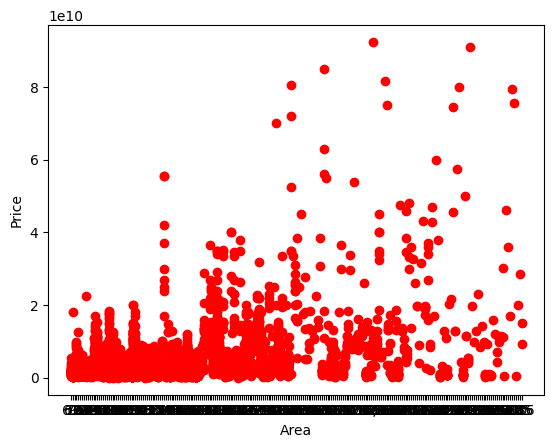

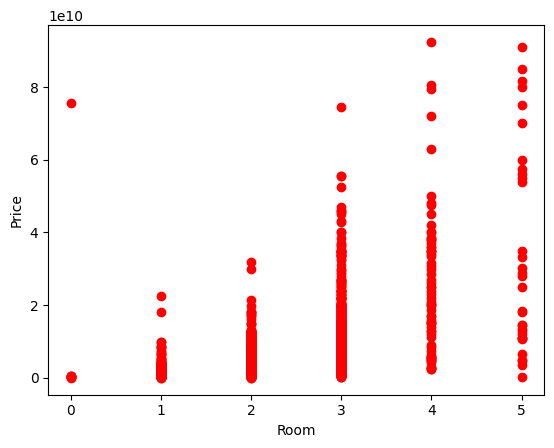

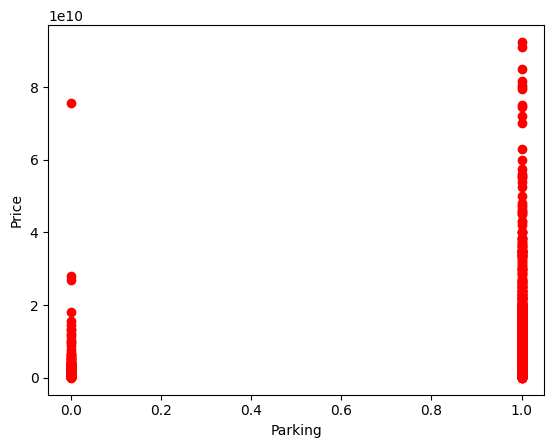

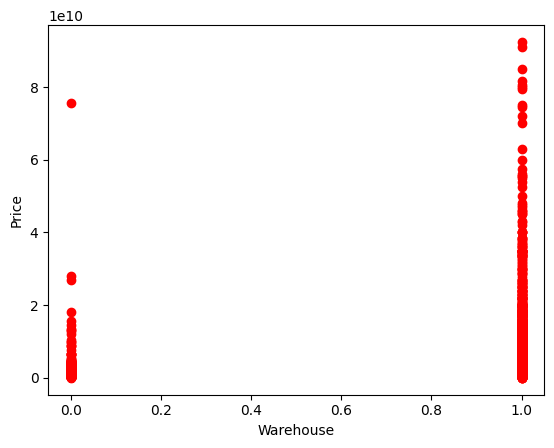

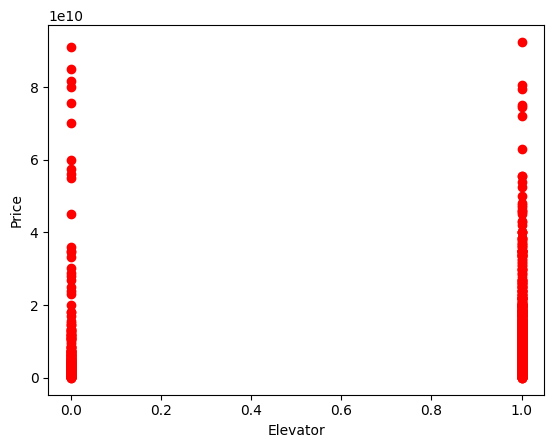

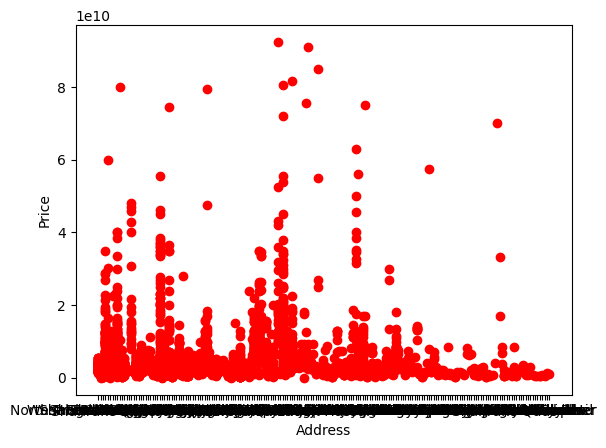

In [6]:
for i in cdf.columns:
    if i == 'Price':
        break
    plt.scatter(cdf[i], cdf['Price'], c='r', marker='o')  # 'r' for red, 'o' for circle marker
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()


In [7]:
msk=np.random.rand(len(my_data)) < 0.8
train=cdf[msk]
test=cdf[~msk]

# multiple

In [8]:
from sklearn import linear_model
def clean_column(column):
    column = column.astype(str)
    return column.str.replace(',', '').str.strip().astype(float)

train['Area'] = clean_column(train['Area'])


train_encoded = pd.get_dummies(train, columns=['Address'])

features_tn = ['Area'] + list(train_encoded.columns[train_encoded.columns.str.startswith('Address_')])
tn_x = np.asanyarray(train_encoded[features_tn])
tn_y = np.asanyarray(train_encoded[['Price']])

reg = linear_model.LinearRegression()
reg.fit(tn_x, tn_y)

test['Area'] = clean_column(test['Area'])

test_encoded = pd.get_dummies(test, columns=['Address'])

test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)
features_tt = ['Area'] + list(test_encoded.columns[train_encoded.columns.str.startswith('Address_')])

z=reg.coef_
a=reg.intercept_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6908\3910313694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Area'] = clean_column(train['Area'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6908\3910313694.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Area'] = clean_column(test['Area'])


In [9]:
from sklearn.metrics import r2_score
tt_x = np.asanyarray(test_encoded[features_tt])
tt_y = np.asanyarray(test_encoded[['Price']])

# پیش‌بینی با مدل
y_hat = reg.predict(tt_x)

# محاسبه و چاپ ارزیابی مدل
print("Residual sum of squares: %.2f" % np.mean((y_hat - tt_y) ** 2))
print("Explained variance score (R^2): %.2f" % r2_score(tt_y, y_hat))

Residual sum of squares: 15061617697076328448.00
Explained variance score (R^2): 0.60


# Polynomial linear

In [15]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

def clean_column(column):
    column = column.astype(str)
    return column.str.replace(',', '').str.strip().astype(float)

train['Area'] = clean_column(train['Area'])

features_tn = ['Area']
tn_x = np.asanyarray(train_encoded[features_tn])
tn_y = np.asanyarray(train_encoded[['Price']])

poly = PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(tn_x)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_6908\737328022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Area'] = clean_column(train['Area'])


In [16]:
reg=linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, tn_y)

print('x1 :', reg.coef_[0][0])
print('x2 :', reg.coef_[0][1])
print('x3 :', reg.coef_[0][2])

print('b :', reg.intercept_[0])

print(F"y =   {reg.coef_[0][1]} X  +  {reg.coef_[0][2]} X2  + {reg.intercept_[0]}")


x1 : 0.0
x2 : 136356922.95660916
x3 : -92350.48441287875
b : -7609111315.420294
y =   136356922.95660916 X  +  -92350.48441287875 X2  + -7609111315.420294


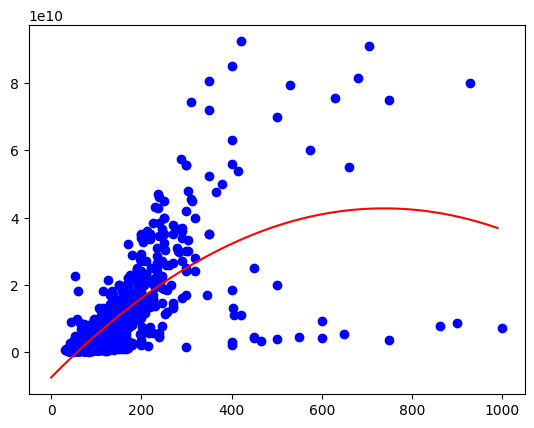

In [17]:
plt.scatter(train['Area'],train['Price'] , color='blue')
xx=np.arange(0,1000,10)
plt.plot(xx  , +reg.coef_[0][1]*xx  + reg.coef_[0][2]*np.power(xx,2)  + reg.intercept_[0],color='red')


In [18]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(tt_x)
test_y_ = reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - tt_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - tt_y) ** 2))
print("R2-score: %.2f" % r2_score(tt_y,test_y_ ) )


ValueError: X has 16290 features, but LinearRegression is expecting 3 features as input.

In [134]:
# ورودی با 3 ویژگی (به عنوان مثال)
reg.predict(np.array([[300, , 1]]))  # 300 متر مربع، 2 اتاق، 1 پارکینگ


array([[-6.83165297e+09]])